**Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Load data into pandas dataframe**

In [2]:
df=pd.read_excel('D:\MACHINE LEARNING\Capstone Project 2\churn.xlsx')
df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,?,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


**Data Description**

In [3]:
df.shape

(5000, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   o

In [5]:
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4999.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,200.391620,99.919200,9.017732,10.261780,4.435200,2.771146,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,50.527789,19.958686,2.273763,2.761396,2.456788,0.745580,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
df.describe(include='O')

,state,phone_number,intl_plan,voice_mail_plan,total_eve_charge,churned
count,5000,5000,5000,5000,5000.0,5000
unique,51,5000,2,2,1660.0,2
top,WV,382-4657,no,no,15.9,False.
freq,158,1,4527,3677,15.0,4293


**Cleaning the data**

Convert feature column ('total_eve_charge') into object type.

In [7]:
df['total_eve_charge']=df['total_eve_charge'].astype('str') 

In [8]:
df['total_eve_charge']

0       16.78
1           ?
2        10.3
3        5.26
4       12.61
        ...  
4995    18.96
4996    21.83
4997    14.69
4998    14.59
4999     22.7
Name: total_eve_charge, Length: 5000, dtype: object

Detecting any ambiguous value ('?')

In [9]:
from numpy import unique
unique(df['total_eve_charge'])

array(['0', '1.9', '10', ..., '9.94', '9.95', '?'], dtype=object)

In [10]:
df[df['total_eve_charge']=='?']['total_eve_charge']

1     ?
5     ?
20    ?
34    ?
50    ?
Name: total_eve_charge, dtype: object

Replacing the ambiguous value ('?') with NaN value

In [11]:
df.replace({'?':np.nan},inplace=True)

In [12]:
df['total_eve_charge'].isnull().sum()

5

In [13]:
df['total_intl_charge'].isnull().sum()

1

In [14]:
df[df['total_intl_charge'].isnull()] 

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,NaN,0,False.


In [15]:
df[df['total_eve_charge'].isnull()]

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,NaN,254.4,103,11.45,13.7,3,3.70,1,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,NaN,203.9,118,9.18,6.3,6,1.70,0,False.
20,FL,147,415,396-5800,no,no,0,155.1,117,26.37,...,93,NaN,208.8,133,9.40,10.6,4,2.86,0,False.
34,OK,57,408,395-2854,no,yes,25,176.8,94,30.06,...,75,NaN,213.5,116,9.61,8.3,4,2.24,0,False.
50,IA,52,408,413-4957,no,no,0,191.9,108,32.62,...,96,NaN,236.8,87,10.66,7.8,5,2.11,3,False.


In [16]:
df.nunique()

state                              51
account_length                    218
area_code                           3
phone_number                     5000
intl_plan                           2
voice_mail_plan                     2
number_vmail_messages              48
total_day_minutes                1961
total_day_calls                   123
total_day_charge                 1961
total_eve_minutes                1879
total_eve_calls                   126
total_eve_charge                 1659
total_night_minutes              1853
total_night_calls                 131
total_night_charge               1028
total_intl_minutes                170
total_intl_calls                   21
total_intl_charge                 170
number_customer_service_calls      10
churned                             2
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               4995 non-null   o

Changing the feature column ('total_eve_charge') back to numerical

In [18]:
df['total_eve_charge']=df['total_eve_charge'].apply(pd.to_numeric)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               4995 non-null   f

Drop any row having atleast one NaN value

In [20]:
df.dropna(axis=0,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4994 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4994 non-null   object 
 1   account_length                 4994 non-null   int64  
 2   area_code                      4994 non-null   int64  
 3   phone_number                   4994 non-null   object 
 4   intl_plan                      4994 non-null   object 
 5   voice_mail_plan                4994 non-null   object 
 6   number_vmail_messages          4994 non-null   int64  
 7   total_day_minutes              4994 non-null   float64
 8   total_day_calls                4994 non-null   int64  
 9   total_day_charge               4994 non-null   float64
 10  total_eve_minutes              4994 non-null   float64
 11  total_eve_calls                4994 non-null   int64  
 12  total_eve_charge               4994 non-null   f

- Calculate the total_net_minutes to reduce the number of features; do the same with calls, and charge.
- Drop all repeated features and useless columns such as state, area_code and phone_number.

In [22]:
df['total_net_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
df['total_net_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
df['total_net_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

In [23]:
df.drop(columns=['state','area_code','phone_number','total_day_charge', 'total_eve_charge','total_night_charge','total_day_calls','total_eve_calls', 
                 'total_night_calls', 'total_day_minutes','total_eve_minutes', 'total_night_minutes'], inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4994 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4994 non-null   int64  
 1   intl_plan                      4994 non-null   object 
 2   voice_mail_plan                4994 non-null   object 
 3   number_vmail_messages          4994 non-null   int64  
 4   total_intl_minutes             4994 non-null   float64
 5   total_intl_calls               4994 non-null   int64  
 6   total_intl_charge              4994 non-null   float64
 7   number_customer_service_calls  4994 non-null   int64  
 8   churned                        4994 non-null   object 
 9   total_net_minutes              4994 non-null   float64
 10  total_net_calls                4994 non-null   int64  
 11  total_net_charge               4994 non-null   float64
dtypes: float64(4), int64(5), object(3)
memory usage:

Check for duplicates in the dataset

In [25]:
dups=df.duplicated()

In [26]:
print(dups.any())

False


Reseting the index

In [27]:
df = df.reset_index(drop=True)

In [28]:
df

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,total_net_minutes,total_net_calls,total_net_charge
0,128,no,yes,25,10.0,3,2.70,1,False.,707.2,300,72.86
1,137,no,no,0,12.2,5,3.29,0,False.,527.2,328,59.00
2,84,yes,no,0,6.6,7,1.78,2,False.,558.2,248,65.02
3,75,yes,no,0,10.1,3,2.73,3,False.,501.9,356,49.36
4,121,no,yes,24,7.5,7,2.03,3,False.,779.3,314,76.28
...,...,...,...,...,...,...,...,...,...,...,...,...
4989,50,no,yes,40,9.9,5,2.67,2,False.,756.2,369,72.42
4990,152,no,no,0,14.7,2,3.97,3,True.,654.6,276,62.75
4991,61,no,no,0,13.6,4,3.67,1,False.,525.8,314,48.15
4992,109,no,no,0,8.5,6,2.30,0,False.,584.9,248,56.79


Convert all yes, no strings into ints such as in columns (intl_plan and voice_mail_plan)

In [29]:
df['intl_plan'] = np.where(df['intl_plan'].str.contains('yes'), 1, 0)
df['voice_mail_plan'] = np.where(df['voice_mail_plan'].str.contains('yes'), 1, 0)
df['churned'] = np.where(df['churned'].str.contains('True.'), 1, 0)

In [30]:
df

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,total_net_minutes,total_net_calls,total_net_charge
0,128,0,1,25,10.0,3,2.70,1,0,707.2,300,72.86
1,137,0,0,0,12.2,5,3.29,0,0,527.2,328,59.00
2,84,1,0,0,6.6,7,1.78,2,0,558.2,248,65.02
3,75,1,0,0,10.1,3,2.73,3,0,501.9,356,49.36
4,121,0,1,24,7.5,7,2.03,3,0,779.3,314,76.28
...,...,...,...,...,...,...,...,...,...,...,...,...
4989,50,0,1,40,9.9,5,2.67,2,0,756.2,369,72.42
4990,152,0,0,0,14.7,2,3.97,3,1,654.6,276,62.75
4991,61,0,0,0,13.6,4,3.67,1,0,525.8,314,48.15
4992,109,0,0,0,8.5,6,2.30,0,0,584.9,248,56.79


In [31]:
# df.columns

Visualization of feature columns

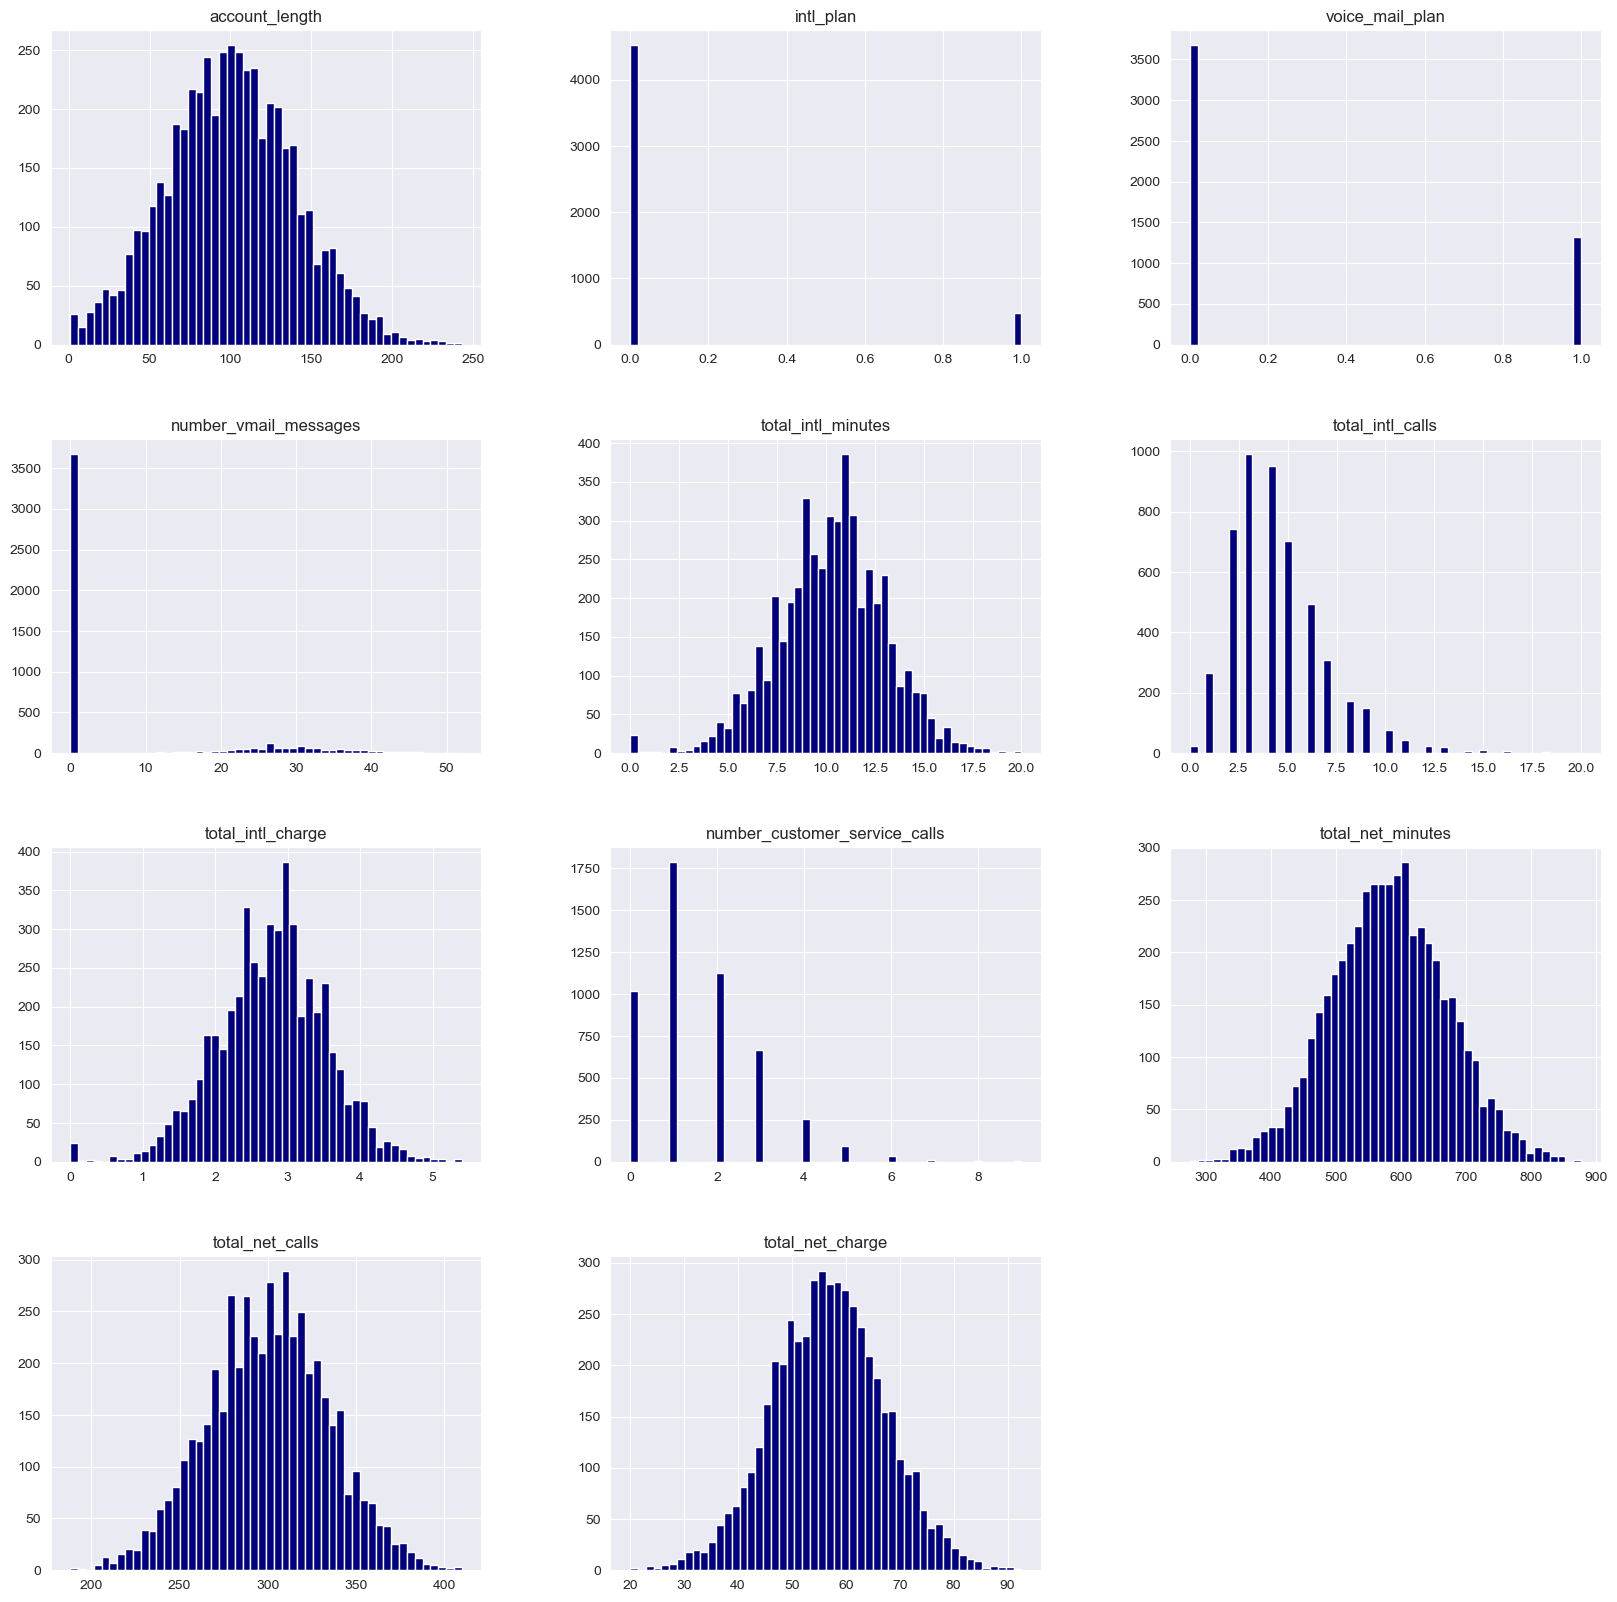

In [32]:
import seaborn as sns
sns.set_style('dark')
temp = df[['account_length', 'intl_plan', 'voice_mail_plan','number_vmail_messages', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls','total_net_minutes', 'total_net_calls', 'total_net_charge' ]]
temp.hist(bins=50,figsize=(20,20),color='navy');

Visualization of target column

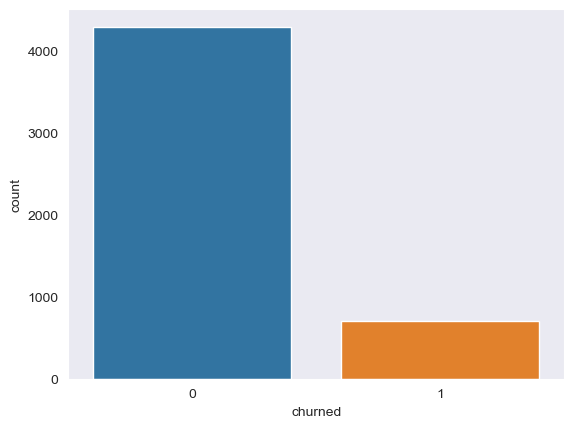

In [33]:
sns.countplot(data=df,x='churned');

Correlation plot

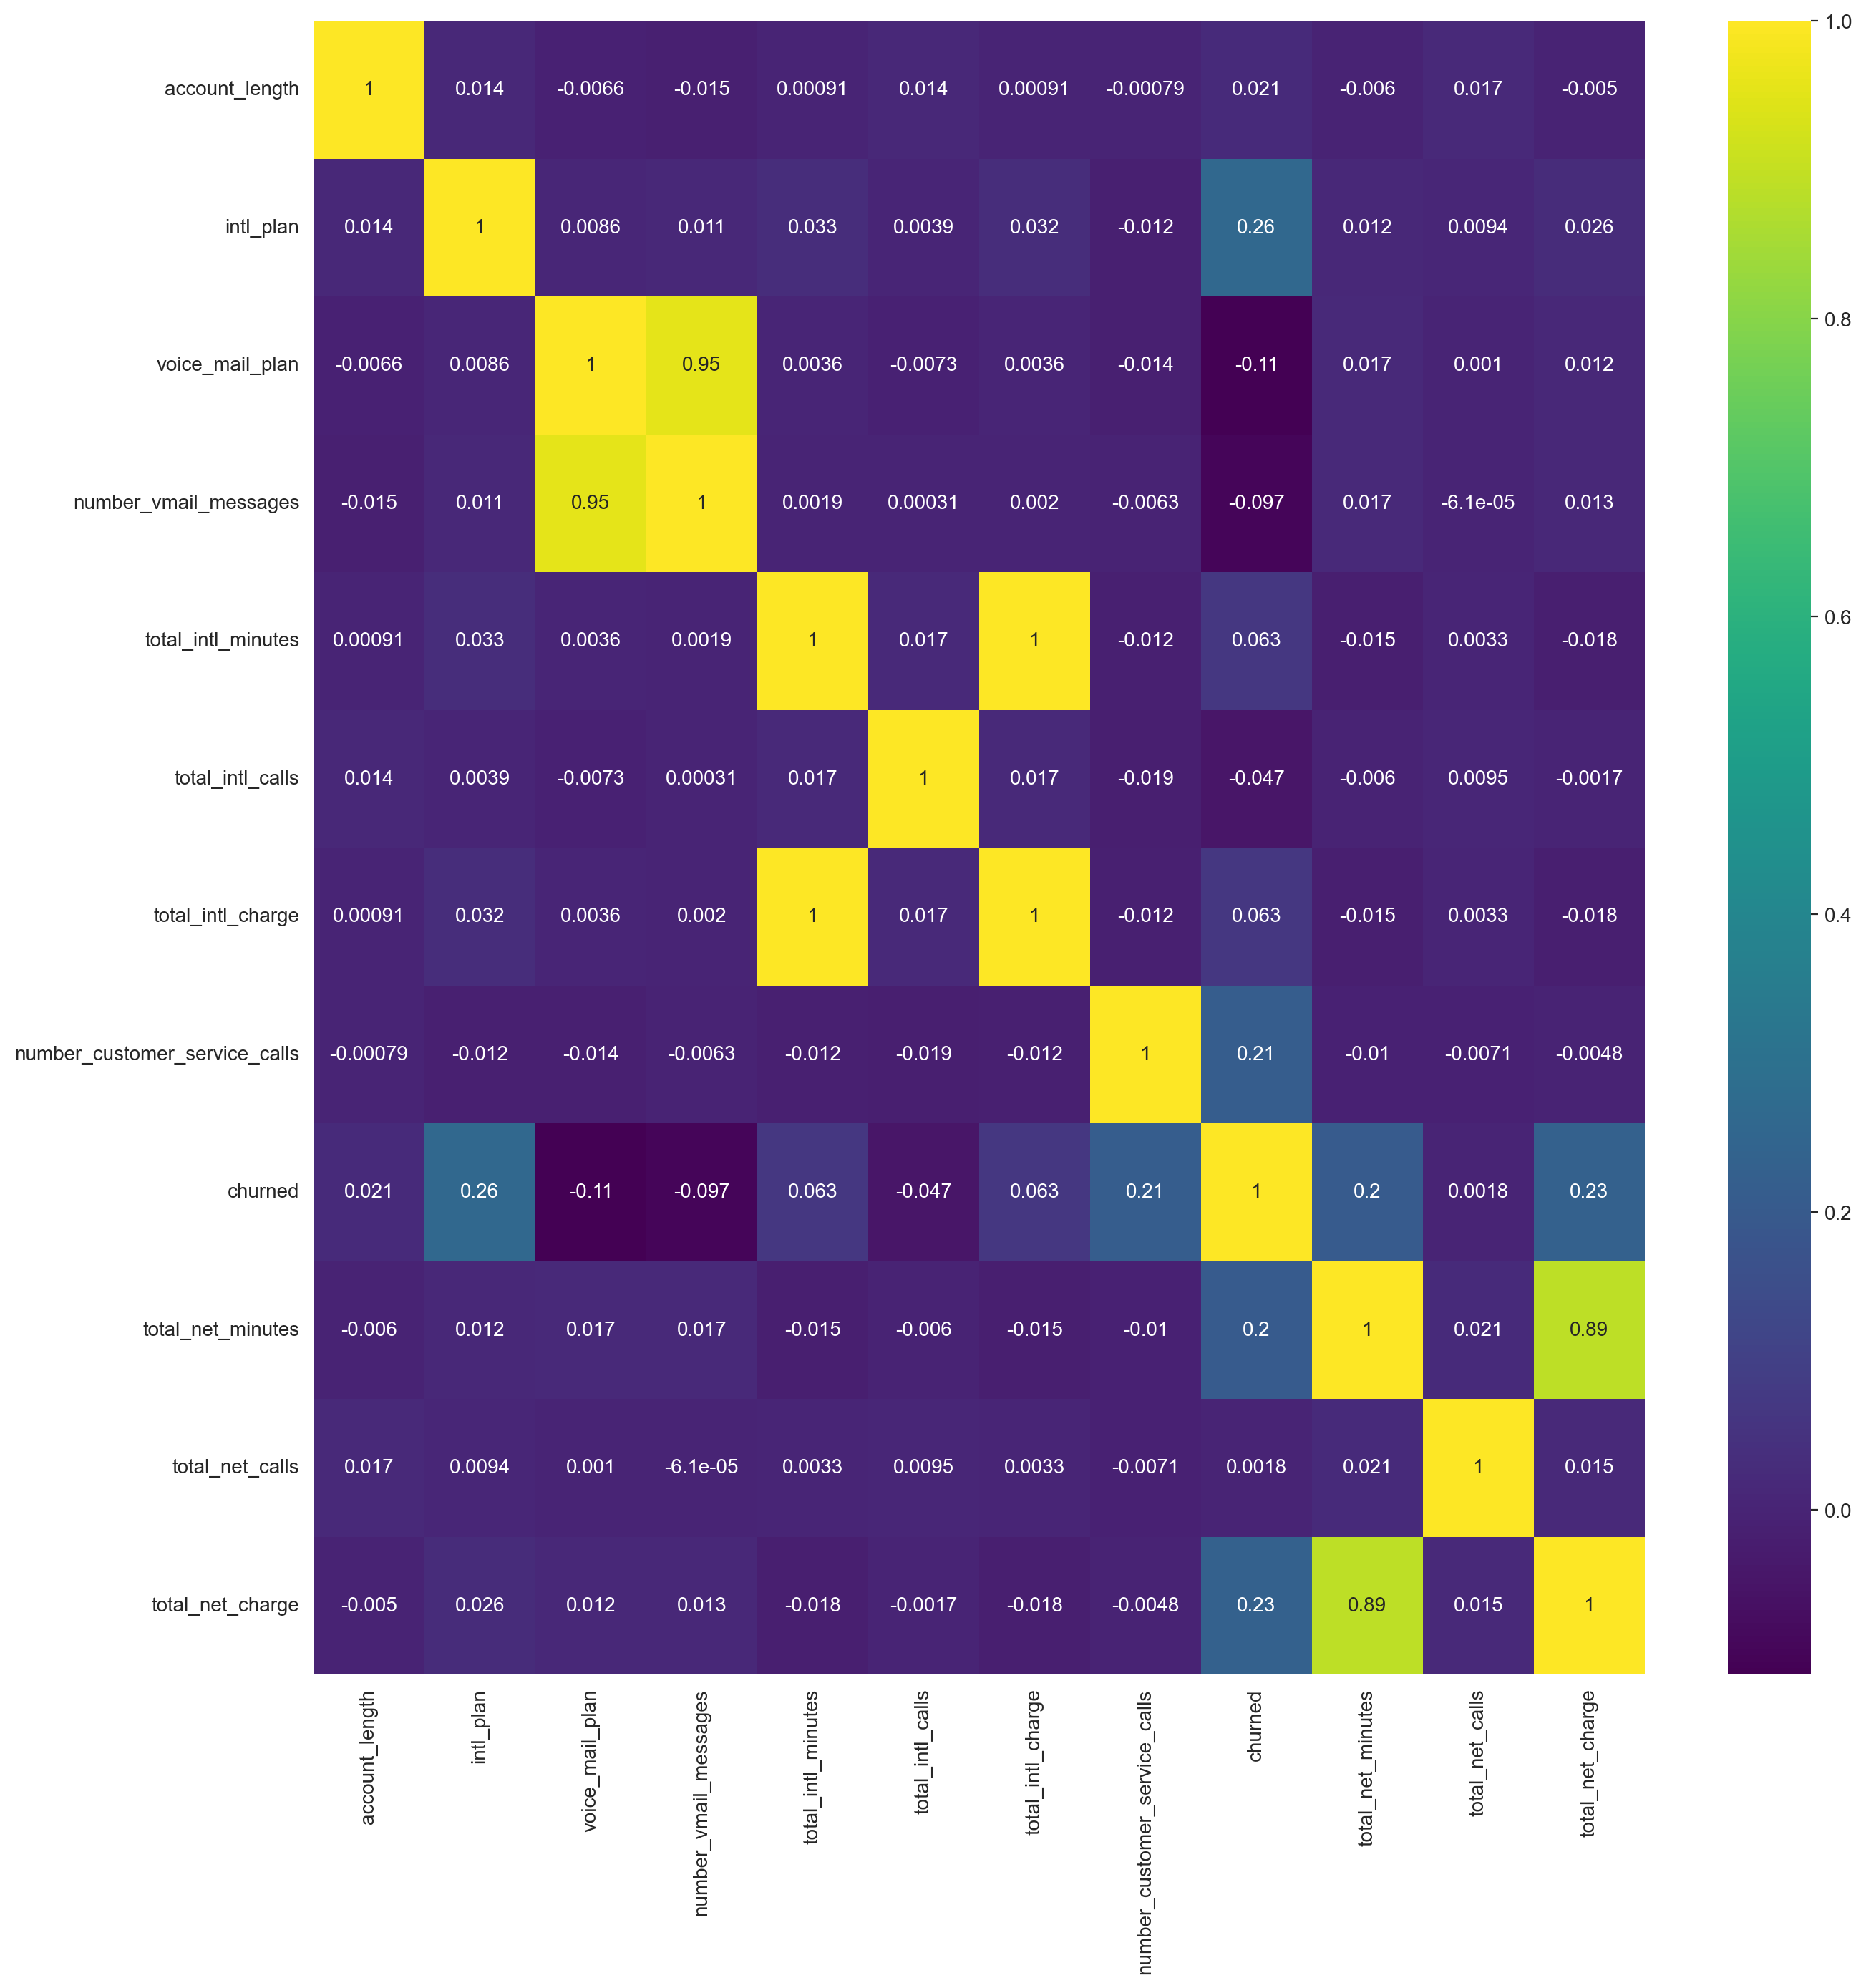

In [34]:
plt.figure(figsize=(15,15),dpi=200)
sns.heatmap(df.corr(),cmap='viridis',annot=True);

**spliting the data**
- Use sklearn to split the data
- Split the dataframe into X, y
- Use train-test-spilt function to split the data
- Use random state to have same data each time you run the program
- Use stratify to cut the data with the same portion

In [35]:
X=df.drop('churned',axis=1)
y=df['churned']

In [36]:
# from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101,stratify=y)

In [37]:
# X_train.shape,y_train.shape

**Scaling the data**

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

**First Model: Logistic Regression**

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
log_model=LogisticRegression(solver='liblinear')

In [41]:
log_model.fit(X_train_scaled,y_train)

LogisticRegression(solver='liblinear')

In [42]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(log_model,X_train_scaled,y_train,cv=10)

In [43]:
scores

array([0.86666667, 0.86666667, 0.87466667, 0.85866667, 0.864     ,
       0.86096257, 0.86096257, 0.87700535, 0.84759358, 0.86363636])

In [44]:
np.mean(scores)

0.8640827094474153

In [45]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [46]:
y_pred = log_model.predict(X_test_scaled)

In [47]:
confusion_matrix(y_test,y_pred)

array([[1049,   23],
       [ 142,   35]], dtype=int64)

C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


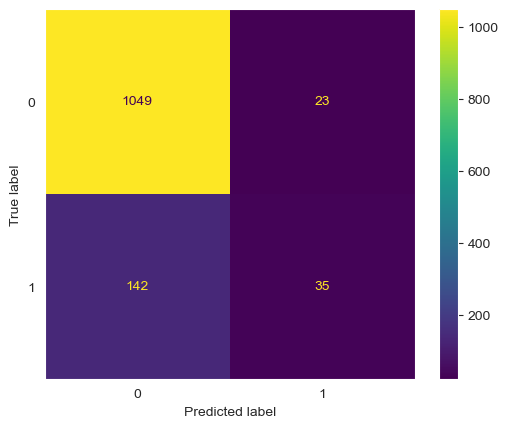

In [48]:
plot_confusion_matrix(log_model,X_test_scaled,y_test);

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1072
           1       0.60      0.20      0.30       177

    accuracy                           0.87      1249
   macro avg       0.74      0.59      0.61      1249
weighted avg       0.84      0.87      0.84      1249



In [50]:
log_model.score(X_test_scaled,y_test)

0.8678943154523618

In [51]:
from sklearn.linear_model import LogisticRegressionCV
logreg=LogisticRegressionCV(solver='liblinear',cv=10)

In [52]:
logreg.fit(X_train_scaled,y_train)

LogisticRegressionCV(cv=10, solver='liblinear')

In [53]:
logreg.fit(X_train_scaled,y_train)

LogisticRegressionCV(cv=10, solver='liblinear')

In [54]:
logreg.coef_

array([[ 0.01633123,  0.15967732, -0.05815798, -0.04448983,  0.02215539,
        -0.0286033 ,  0.02214147,  0.12939286,  0.08717772,  0.00295752,
         0.11226394]])

In [55]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [56]:
y_pred = logreg.predict(X_test_scaled)

In [57]:
confusion_matrix(y_test,y_pred)

array([[1055,   17],
       [ 153,   24]], dtype=int64)

C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


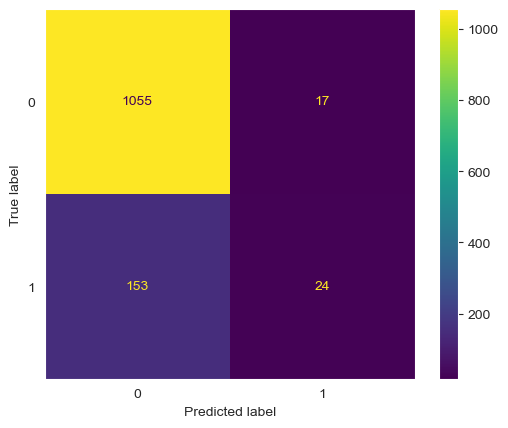

In [58]:
plot_confusion_matrix(logreg,X_test_scaled,y_test);

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.93      1072
           1       0.59      0.14      0.22       177

    accuracy                           0.86      1249
   macro avg       0.73      0.56      0.57      1249
weighted avg       0.83      0.86      0.83      1249



In [60]:
lr_ac=logreg.score(X_test_scaled,y_test)
lr_ac

0.8638911128903123

**Second Model: Support Vector Machine**

In [61]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [62]:
svm = SVC()
myparam_grid = {'C':np.logspace(-3,2,6),'kernel':['linear','rbf'], 'gamma':['scale','auto']}
grid=GridSearchCV(svm,param_grid=myparam_grid,cv=5,return_train_score=True)

In [63]:
grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True)

In [64]:
# grid.best_score_

In [74]:
grid.best_params_

{'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}

In [75]:
grid_preds=grid.predict(X_test_scaled)

In [76]:
confusion_matrix(y_test,grid_preds)

array([[1057,   15],
       [  49,  128]], dtype=int64)

C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


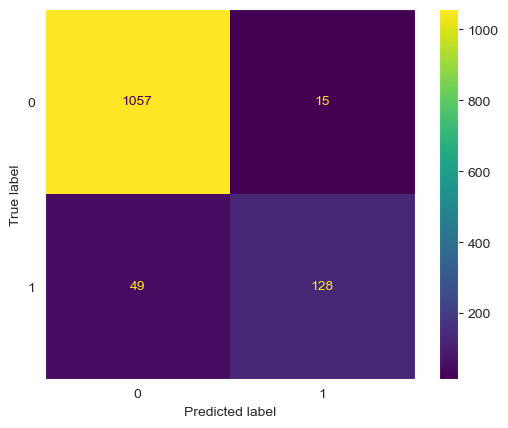

In [68]:
plot_confusion_matrix(grid,X_test_scaled,y_test);

In [69]:
print(classification_report(y_test,grid_preds))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1072
           1       0.90      0.72      0.80       177

    accuracy                           0.95      1249
   macro avg       0.93      0.85      0.89      1249
weighted avg       0.95      0.95      0.95      1249



In [77]:
svm_ac=grid.score(X_test_scaled,y_test)
svm_ac

0.9487590072057646

**Third Model: Decision Tree**

In [71]:
# from sklearn.tree import plot_tree
# plt.figure(figsize=(12,8))
# plot_tree(model);
# plt.show()

In [78]:
from sklearn.tree import DecisionTreeClassifier
param_grid={"max_depth":range(1,7)}

In [79]:
from sklearn.model_selection import GridSearchCV
grid_dtc=GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid=param_grid,cv=10,return_train_score=True)

In [80]:
grid_dtc.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 7)}, return_train_score=True)

In [81]:
grid_dtc.best_params_

{'max_depth': 6}

In [82]:
grid_dtc_pred =grid_dtc.predict(X_test_scaled)

In [83]:
confusion_matrix(y_test,grid_dtc_pred)

array([[1068,    4],
       [  25,  152]], dtype=int64)

In [84]:
print(classification_report(y_test,grid_dtc_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1072
           1       0.97      0.86      0.91       177

    accuracy                           0.98      1249
   macro avg       0.98      0.93      0.95      1249
weighted avg       0.98      0.98      0.98      1249



In [ ]:
# grid_dt.best_score_

In [85]:
dtc_ac=grid_dtc.score(X_test_scaled,y_test)
dtc_ac

0.9767814251401121

**Fourth Model: Random Forest**

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
n_estimators=[64,100,128,200]
max_features= [2,4,6,8,10,11]
bootstrap = [True,False]
oob_score = [True,False]

In [88]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

In [89]:
rfc = RandomForestClassifier()
grid_rfc = GridSearchCV(rfc,param_grid)

In [90]:
grid_rfc.fit(X_train_scaled,y_train)

C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFa

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 4, 6, 8, 10, 11],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [91]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 6, 'n_estimators': 100, 'oob_score': False}

In [93]:
grid_rfc_pred =grid_rfc.predict(X_test_scaled)

C:\Users\Priyambada\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


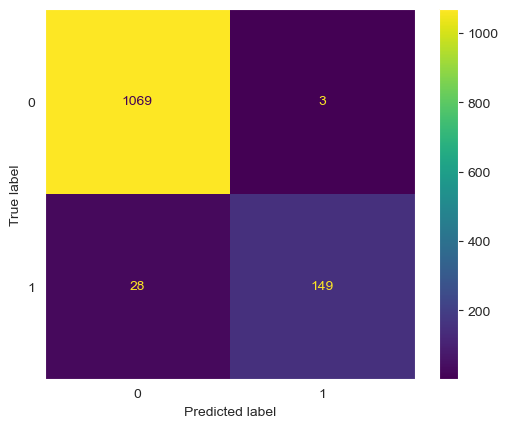

In [94]:
plot_confusion_matrix(grid_rfc,X_test_scaled,y_test)

In [95]:
print(classification_report(y_test,grid_rfc_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1072
           1       0.98      0.84      0.91       177

    accuracy                           0.98      1249
   macro avg       0.98      0.92      0.95      1249
weighted avg       0.98      0.98      0.97      1249



In [98]:
# grid_rfc.best_score_

In [99]:
rfc_ac=grid_rfc.score(X_test_scaled,y_test)
rfc_ac

0.9751801441152922

**Gradient Boosting Classifier**

In [100]:
from sklearn.ensemble import GradientBoostingClassifier

In [101]:
param_grid={"n_estimators":[1,5,10,20,40,100,200],'max_depth':[3,4,5,6,10,12]}

In [102]:
gb_model = GradientBoostingClassifier()

In [103]:
grid_gb = GridSearchCV(gb_model,param_grid)

In [104]:
grid_gb.fit(X_train_scaled,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 10, 12],
                         'n_estimators': [1, 5, 10, 20, 40, 100, 200]})

In [106]:
grid_gb.best_params_

{'max_depth': 6, 'n_estimators': 20}

In [107]:
predictions = grid_gb.predict(X_test_scaled)

In [108]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1072
           1       0.99      0.85      0.92       177

    accuracy                           0.98      1249
   macro avg       0.98      0.93      0.95      1249
weighted avg       0.98      0.98      0.98      1249



In [120]:
gb_ac=grid_gb.score(X_test_scaled,y_test)
gb_ac

0.977582065652522

In [110]:
grid_gb.best_estimator_.feature_importances_

array([0.01045378, 0.08781822, 0.06847815, 0.0410272 , 0.05664884,
       0.0838812 , 0.07138278, 0.11025284, 0.00265439, 0.00561229,
       0.46179031])

In [111]:
feat_import = grid_gb.best_estimator_.feature_importances_

In [112]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [113]:
imp_feats

,Importance
account_length,0.010454
intl_plan,0.087818
voice_mail_plan,0.068478
number_vmail_messages,0.041027
total_intl_minutes,0.056649
total_intl_calls,0.083881
total_intl_charge,0.071383
number_customer_service_calls,0.110253
total_net_minutes,0.002654
total_net_calls,0.005612


In [115]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
total_net_charge,0.461790
number_customer_service_calls,0.110253
intl_plan,0.087818
total_intl_calls,0.083881
total_intl_charge,0.071383
voice_mail_plan,0.068478
total_intl_minutes,0.056649
number_vmail_messages,0.041027
account_length,0.010454
total_net_calls,0.005612


In [116]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,11.0,0.090909,0.12809,0.002654,0.02574,0.068478,0.08585,0.46179


In [117]:
imp_feats.sort_values('Importance')

,Importance
total_net_minutes,0.002654
total_net_calls,0.005612
account_length,0.010454
number_vmail_messages,0.041027
total_intl_minutes,0.056649
voice_mail_plan,0.068478
total_intl_charge,0.071383
total_intl_calls,0.083881
intl_plan,0.087818
number_customer_service_calls,0.110253


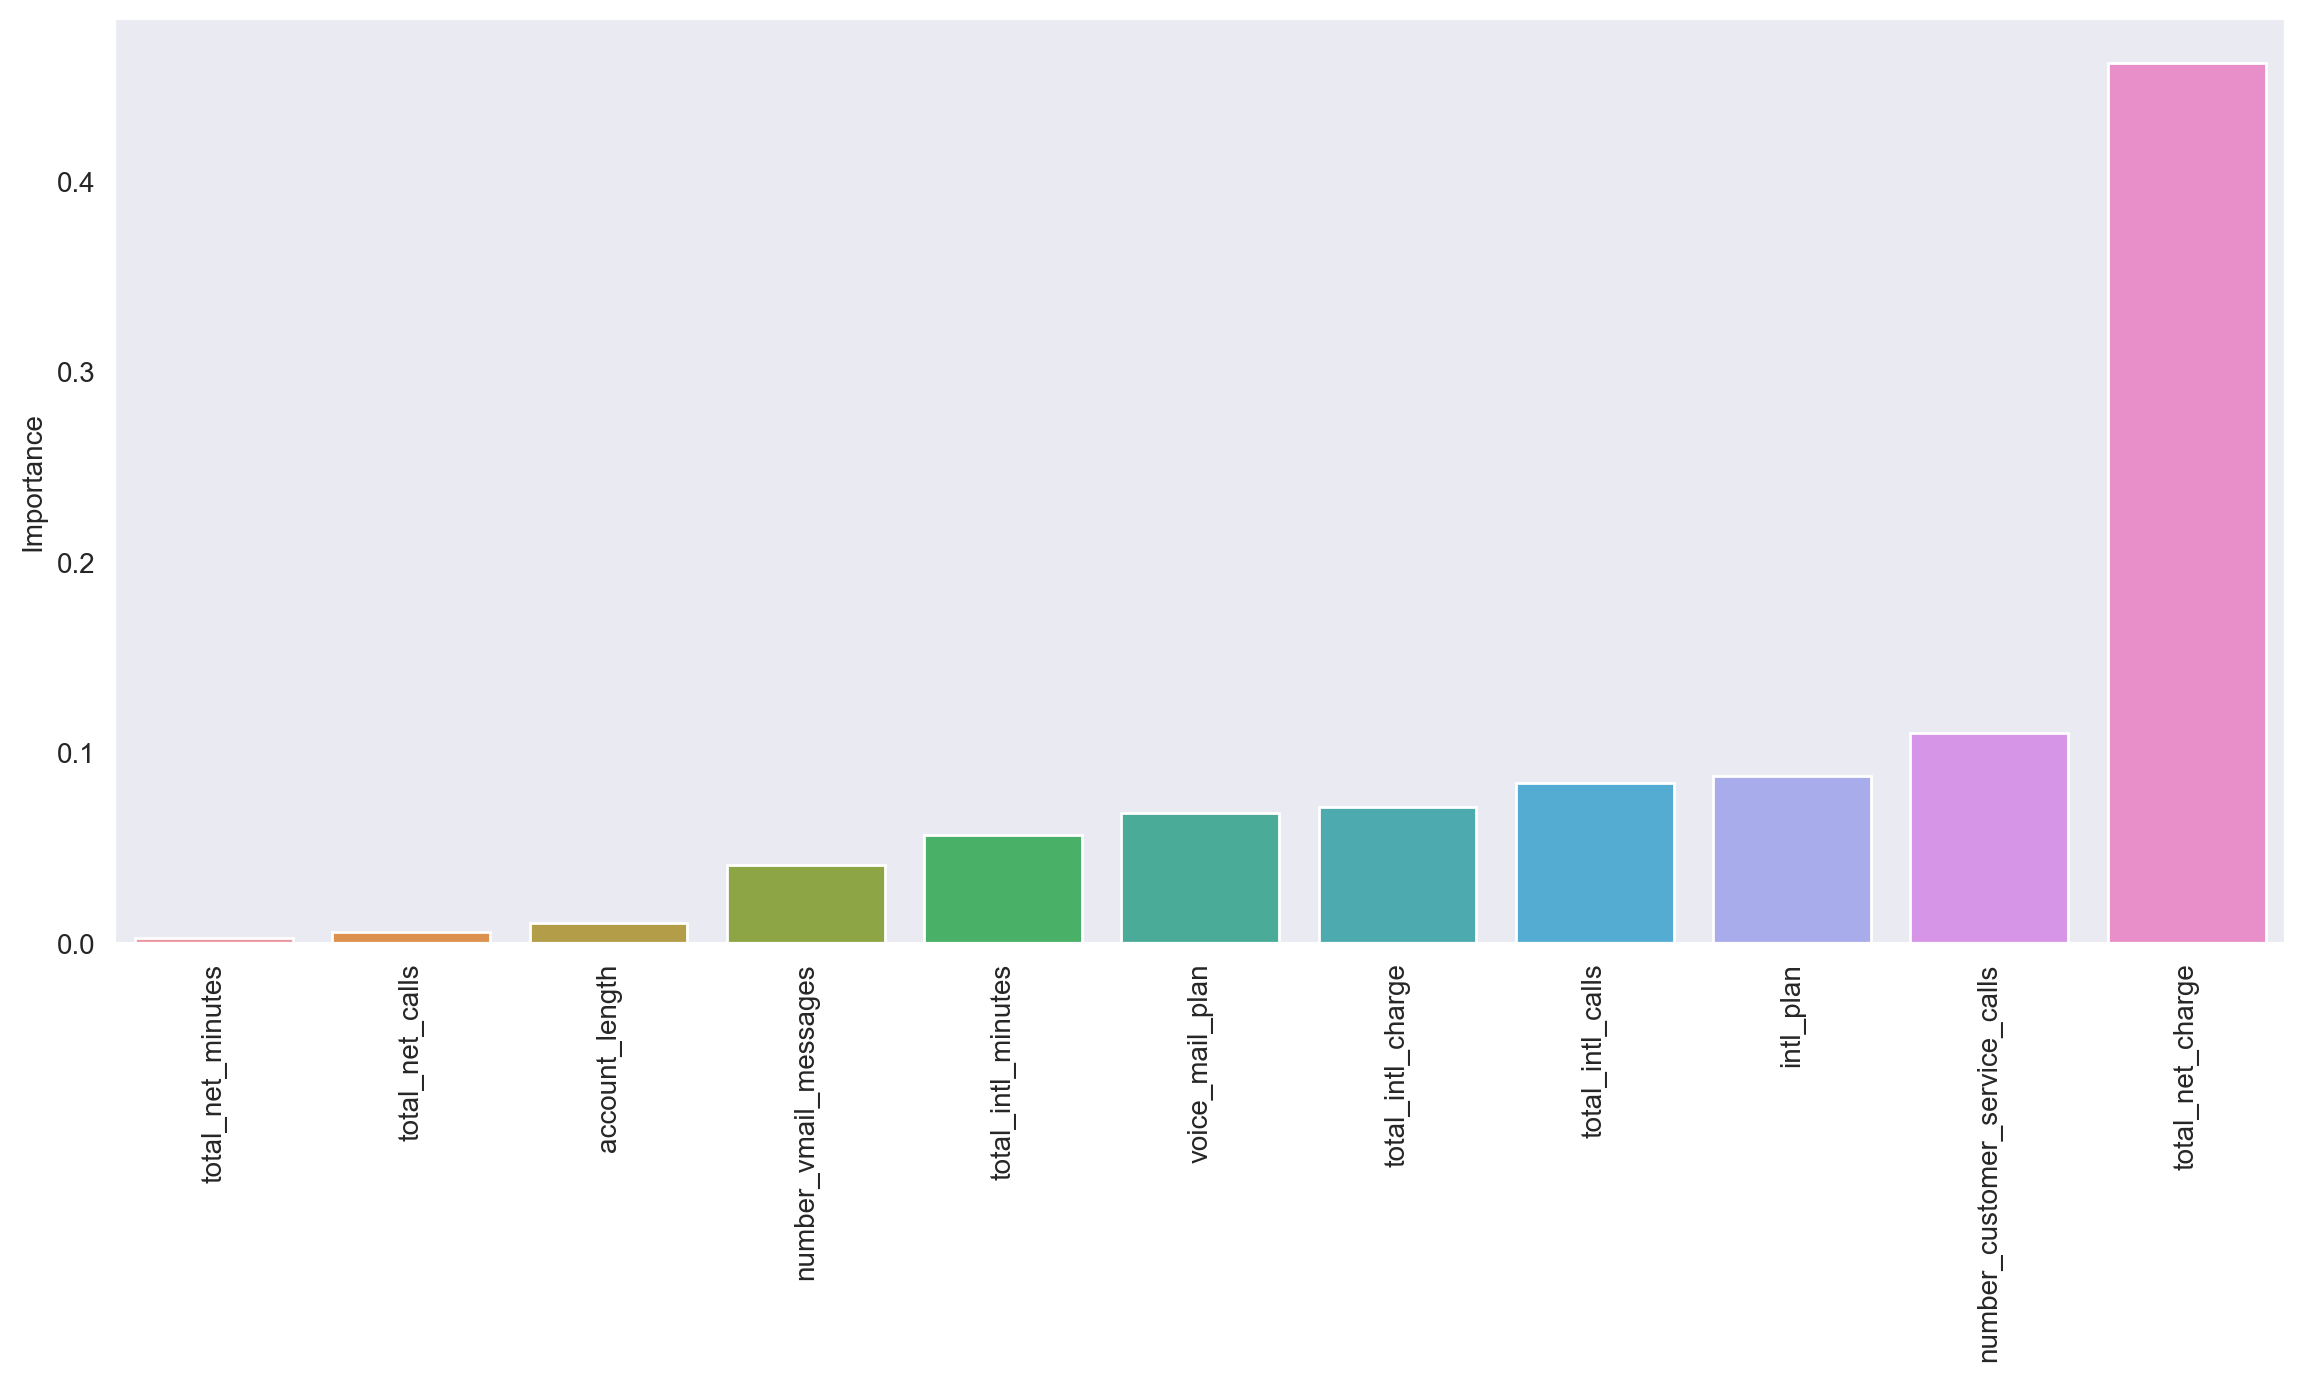

In [118]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);

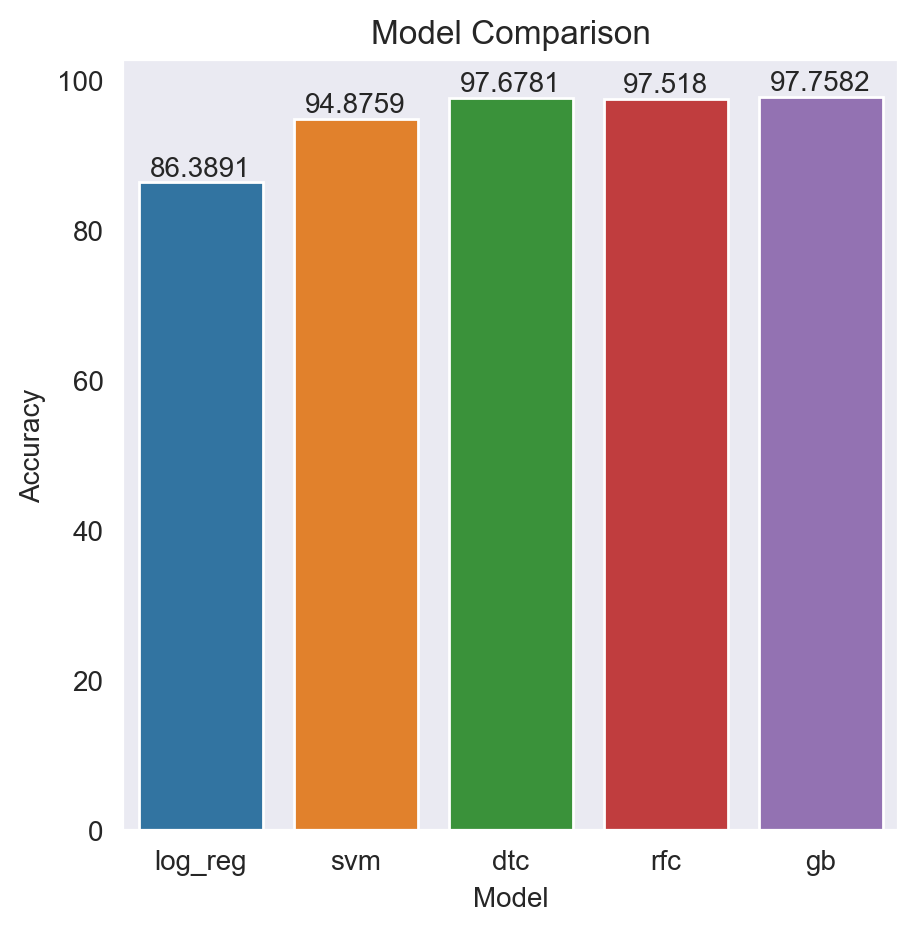

In [153]:
best_model={'log_reg':lr_ac*100,
           'svm':svm_ac*100,
           'dtc':dtc_ac*100,
           'rfc':rfc_ac*100,
           'gb':gb_ac*100}

my_df = pd.DataFrame(best_model.items(),columns=['Model','Accuracy'])
plt.figure(figsize=(5,5),dpi=200)
ax = sns.barplot(x='Model', y='Accuracy', data=my_df)
ax.set(title='Model Comparison');
# for i in ax.containers:
#     ax.bar_label(i,)
ax.bar_label(ax.containers[0]);